# Importing necessary libraries

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import RMSprop

# Loading the dataset

In [ ]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
train = mnist_train_images.reshape(60000,784)
test = mnist_test_images.reshape(10000,784)

# Converting the input to the format which keras accepts

In [ ]:
train = train.astype('float32')
test = test.astype('float32')
train /= 255
test /= 255

# Converting labels/dependent variable to one hot encoding vectors

In [ ]:
train_labels = keras.utils.to_categorical(mnist_train_labels,10)
test_labels = keras.utils.to_categorical(mnist_test_labels,10)

# Visualizing the dataset using matplotlib

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


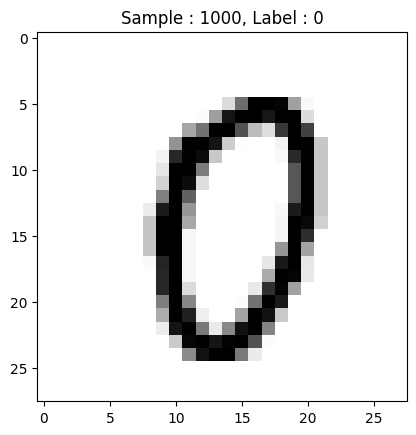

In [ ]:
import matplotlib.pyplot as plt
def display(num):
  print(train_labels[num])
  label = train_labels[num].argmax(axis=0)
  image = train[num].reshape([28,28])
  plt.title('Sample : %d, Label : %d' % (num,label))
  plt.imshow(image,cmap=plt.get_cmap('gray_r'))
  plt.show()
display(1000)

# Building Sequential Mode In Neural Network

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model Optimization

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

# Fitting the training data to the model

In [ ]:
history = model.fit(train, train_labels, batch_size = 100, epochs=10, verbose=2, validation_data=(test, test_labels))

Epoch 1/10
600/600 - 10s - loss: 0.2412 - accuracy: 0.9260 - val_loss: 0.1075 - val_accuracy: 0.9671 - 10s/epoch - 17ms/step
Epoch 2/10
600/600 - 8s - loss: 0.1015 - accuracy: 0.9685 - val_loss: 0.0755 - val_accuracy: 0.9780 - 8s/epoch - 14ms/step
Epoch 3/10
600/600 - 9s - loss: 0.0741 - accuracy: 0.9776 - val_loss: 0.0684 - val_accuracy: 0.9791 - 9s/epoch - 15ms/step
Epoch 4/10
600/600 - 12s - loss: 0.0588 - accuracy: 0.9819 - val_loss: 0.0667 - val_accuracy: 0.9802 - 12s/epoch - 20ms/step
Epoch 5/10
600/600 - 14s - loss: 0.0489 - accuracy: 0.9852 - val_loss: 0.0730 - val_accuracy: 0.9803 - 14s/epoch - 23ms/step
Epoch 6/10
600/600 - 14s - loss: 0.0405 - accuracy: 0.9871 - val_loss: 0.0727 - val_accuracy: 0.9794 - 14s/epoch - 23ms/step
Epoch 7/10
600/600 - 13s - loss: 0.0346 - accuracy: 0.9892 - val_loss: 0.0715 - val_accuracy: 0.9822 - 13s/epoch - 22ms/step
Epoch 8/10
600/600 - 14s - loss: 0.0305 - accuracy: 0.9903 - val_loss: 0.0724 - val_accuracy: 0.9824 - 14s/epoch - 23ms/step
Epoc

# Model Evaluation

In [ ]:
score = model.evaluate(test, test_labels, verbose=0)
print("Test loss", score[0])
print("Test accuracy", score[1])

Test loss 0.08491946756839752
Test accuracy 0.9818000197410583


# Finding which numbers have been wrongly predicted

1/1 [==============================] - 0s 23ms/step


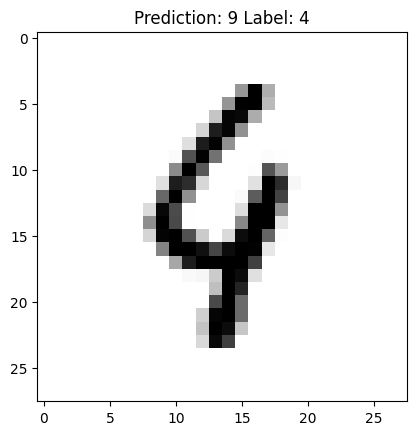

1/1 [==============================] - 0s 22ms/step


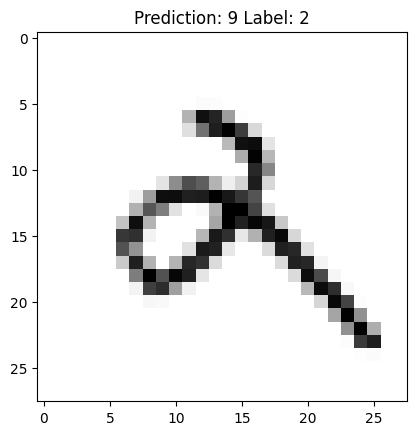

1/1 [==============================] - 0s 26ms/step


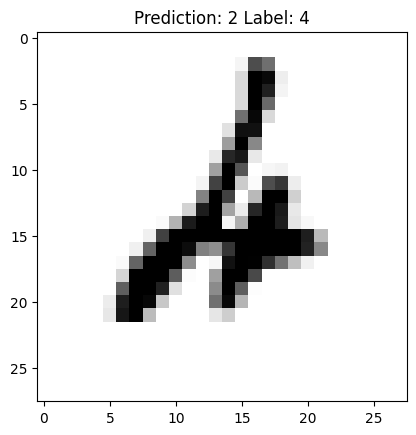

1/1 [==============================] - 0s 21ms/step


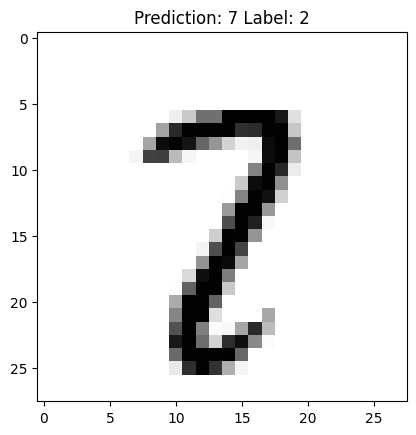

1/1 [==============================] - 0s 30ms/step


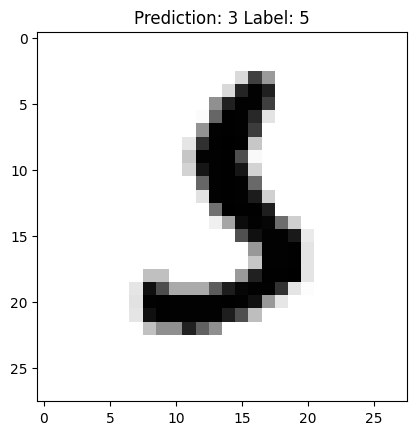

1/1 [==============================] - 0s 24ms/step


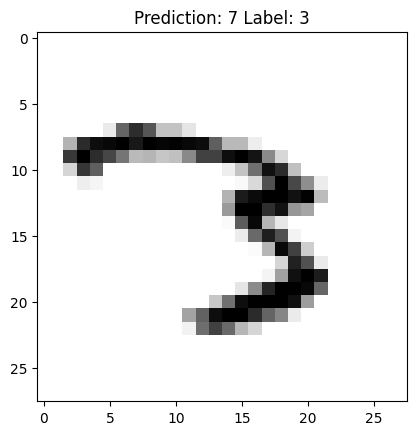

1/1 [==============================] - 0s 23ms/step


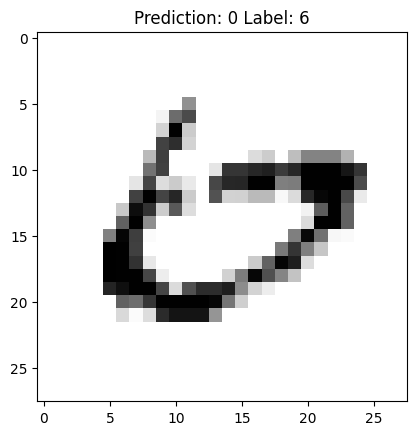

1/1 [==============================] - 0s 22ms/step


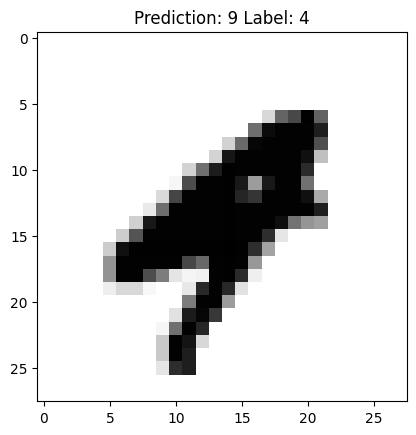

1/1 [==============================] - 0s 21ms/step


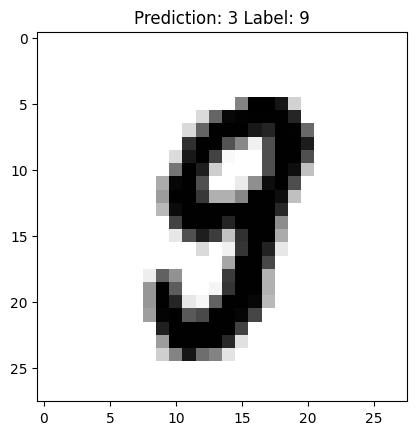

1/1 [==============================] - 0s 34ms/step


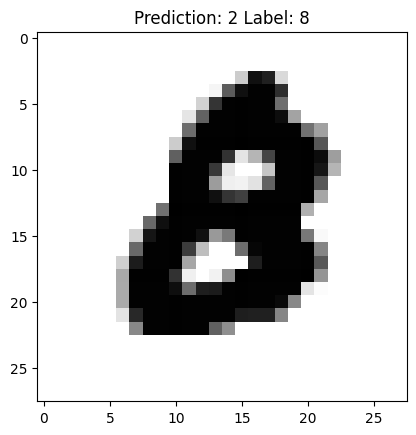

1/1 [==============================] - 0s 23ms/step


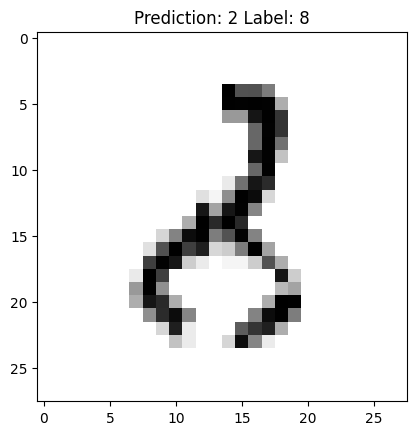

1/1 [==============================] - 0s 20ms/step


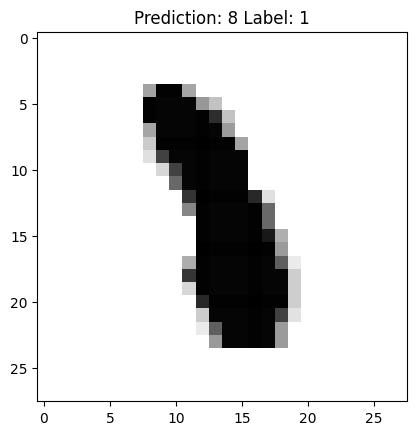

1/1 [==============================] - 0s 31ms/step


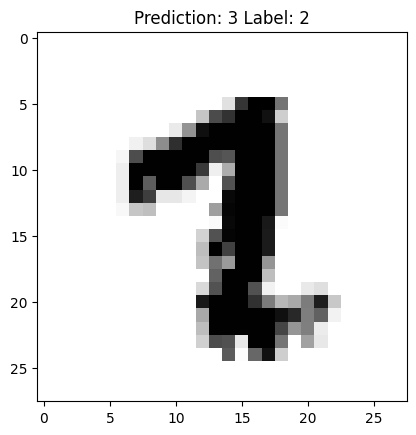

1/1 [==============================] - 0s 24ms/step


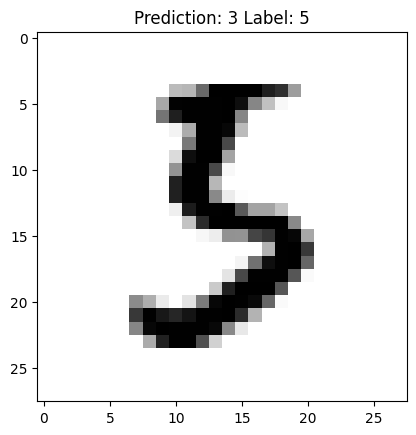

1/1 [==============================] - 0s 22ms/step


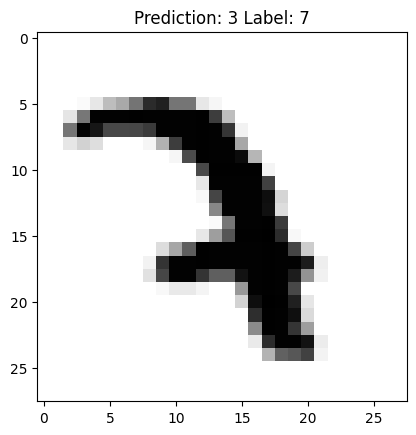

1/1 [==============================] - 0s 21ms/step


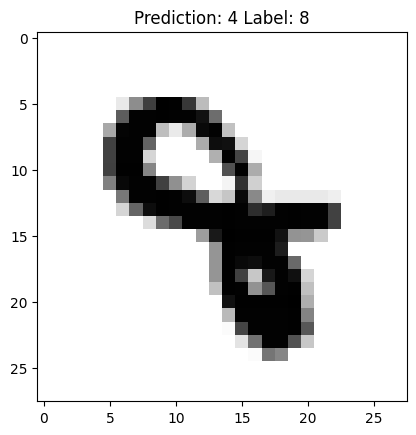

1/1 [==============================] - 0s 21ms/step


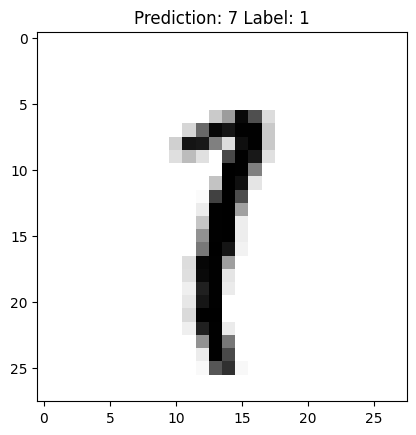

1/1 [==============================] - 0s 22ms/step


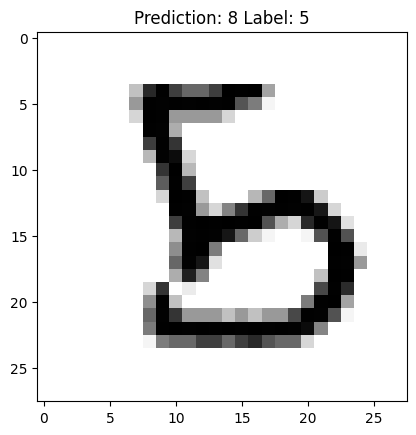

1/1 [==============================] - 0s 28ms/step


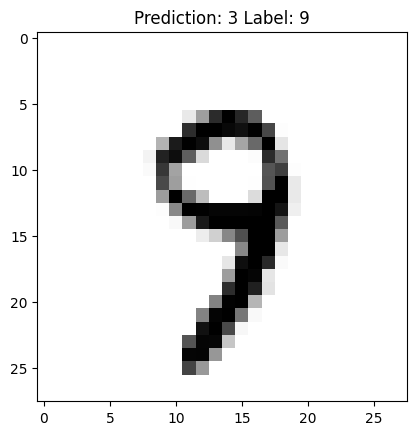

1/1 [==============================] - 0s 24ms/step


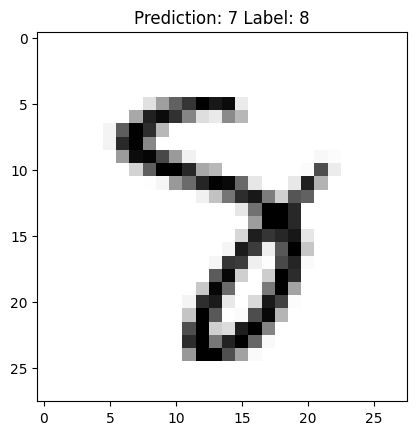

1/1 [==============================] - 0s 22ms/step


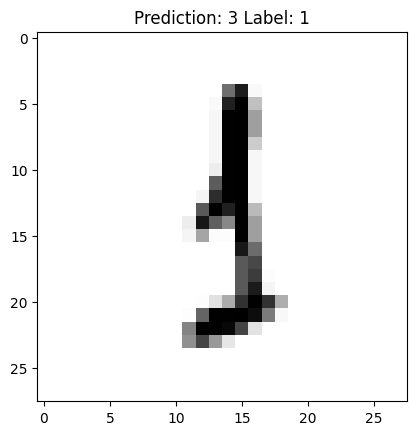

1/1 [==============================] - 0s 31ms/step


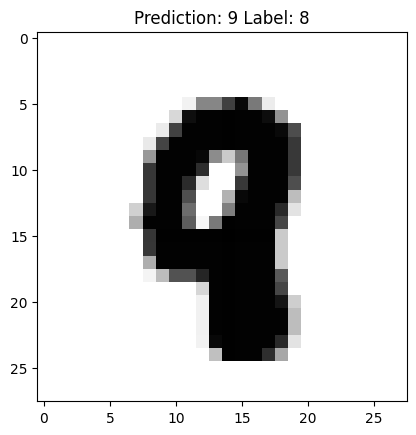

1/1 [==============================] - 0s 23ms/step


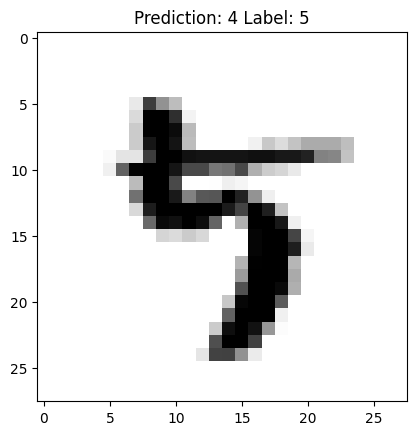

1/1 [==============================] - 0s 21ms/step


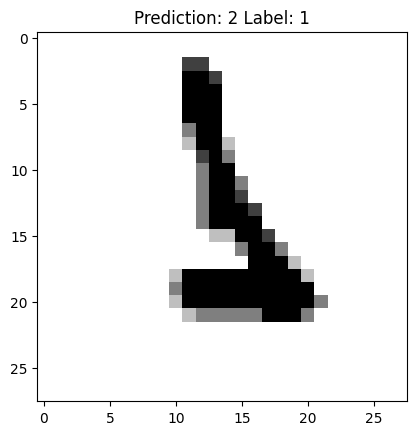

1/1 [==============================] - 0s 22ms/step


In [ ]:
for x in range(1000):
  test_image = test[x,:].reshape(1,784)
  predicted_cat = model.predict(test_image).argmax()
  label = test_labels[x].argmax()
  if(predicted_cat!=label):
    plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
    plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()